## Visualizations

In [1]:
from Poseidon.utils import *
from Poseidon.meteo import *
from IPython.display import HTML

### setup

In [11]:
#define in a dictionary the properties e.g
dic={'lon0':0., # lat/lon window
     'lon1':10.,
     'lat0':28.,
     'lat1':38.}

### extract meteo forcing

In [12]:
# specify the forecast times ft1,ft2
ft1 = 0
ft2 = 2 #that is 0,1 hours

In [13]:
# parse the ecmwf grib file.
m = ecmwf(mpath='/Users/brey/Downloads/20130301.00.tropical_cyclone.grib',ft1=ft1,ft2=ft2,**dic)

100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


meteo done


## basemap

In [13]:
win={'lon0':-10, # lat/lon window of the figure
     'lon1':20.,
     'lat0':20.,
     'lat1':45.}

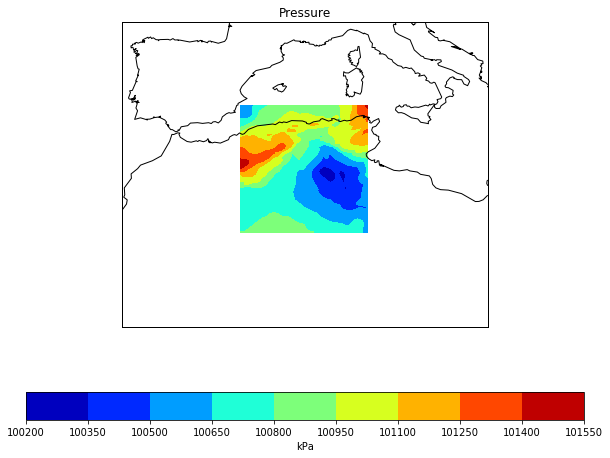

In [19]:
#
map(m.lons,m.lats,m.p[1,:,:],title='Pressure',label='kPa',ticks=False,**win)

## to PNG

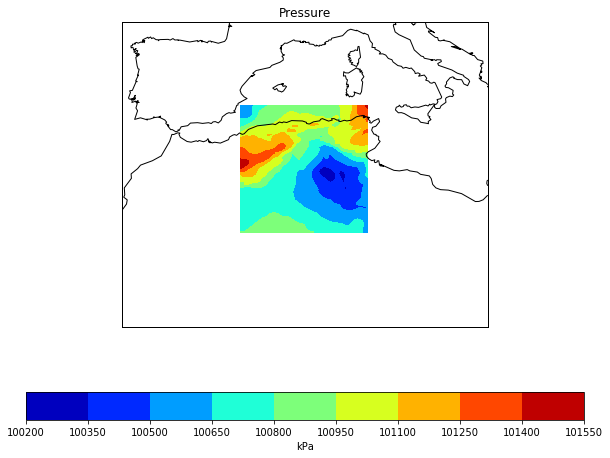

In [9]:
#
map(m.lons,m.lats,m.p[1,:,:],title='Pressure',label='kPa',png=True,path='/Users/brey/Downloads/fig.png',**win)

## to JSON

## load on map

## D3D results

In [2]:
data=DataFile('/Users/brey/Downloads/20130301.00/trim-test.nc')

In [3]:
grid=Grid.fromfile('/Users/brey/Downloads/20130301.00/test.grd')

In [4]:
deb=Dep.read('/Users/brey/Downloads/20130301.00/test.dep',grid.shape)

In [5]:
d=deb.val[:-1,:-1]
w=d>0

In [6]:
x = grid.x.data

In [7]:
y = grid.y.data

In [8]:
h = data['S1'][:,:-1,:-1]

In [9]:
x.shape, h.shape, w.shape

((101, 101), (13, 101, 101), (101, 101))

In [10]:
ww = np.broadcast_to(w == True, h.shape)

In [15]:
z = np.ma.masked_where(ww==True,h)

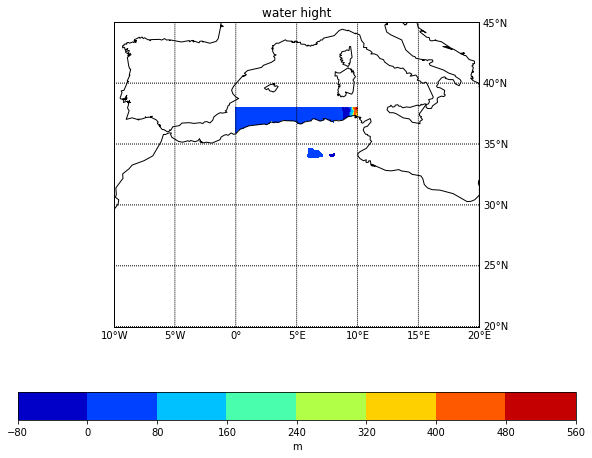

In [16]:
#see one frame
map(x,y,z[8,:,:],title='water hight',label='m',ticks=True,**win)

In [19]:
#animate
a = anim(x,y,z,**win)

In [20]:
#show
a

In [21]:
#save it
a.save('/Users/brey/Downloads/anim.mp4', fps=10, extra_args=['-vcodec','libx264','-pix_fmt','yuv420p'])